<a href="https://colab.research.google.com/github/Asser146/ML-Assignments/blob/master/Assignment4/Unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [117]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [118]:
df = pd.read_csv('/content/Breast Cancer data.csv')
target = df['diagnosis']
del df['id']
del df['diagnosis']
del df['Unnamed: 32']
df.head()
df.shape

(569, 30)

In [119]:
def kmeans(X, k, max_iters=100, tol=0.0001):

    # Randomize initial centroids
    randomized_indices = np.random.permutation(X.shape[0])[:k]
    centroids = X.iloc[randomized_indices].to_numpy()
    labels = np.zeros(X.shape[0], dtype=int)

    for _ in range(max_iters):
        # Assign each point to the closest centroid
        for i in range(len(X)):
          min_distance = float('inf')
          for j in range(k):
              distance = np.linalg.norm(X.iloc[i].to_numpy() - centroids[j])
              if distance < min_distance:
                  min_distance = distance
                  labels[i] = j

        # Update centroids
        new_centroids = []
        for i in range(k):
            cluster_points = X[labels == i]
            cluster_mean = cluster_points.mean(axis=0)
            new_centroids.append(cluster_mean)

        new_centroids = np.array(new_centroids)

        # Check for convergence
        if np.linalg.norm(new_centroids - centroids) < tol:
            break

        centroids = new_centroids

    return centroids, labels

In [120]:
def elbow_method(X, max_clusters=10):
    costs = []

    for k in range(1, max_clusters + 1):
        centroids, labels = kmeans(X, k)
        cost = np.sum((X - centroids[labels]) ** 2)
        costs.append(cost)

    plt.plot(range(1, max_clusters + 1), costs, marker='o')
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Cost')
    plt.show()

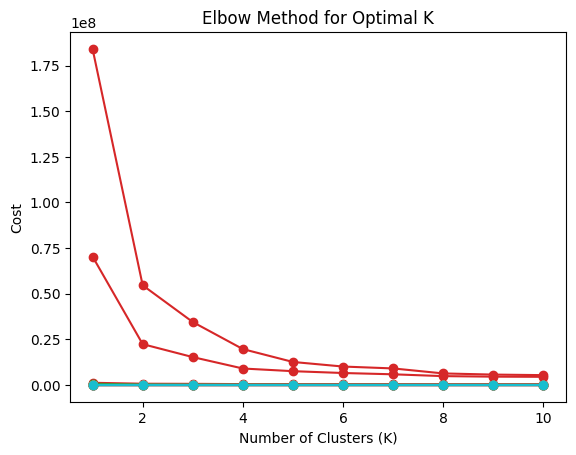

In [121]:
costs = elbow_method(df,10)


In [127]:
# Elbow is at 2
k = 2

centroids , labels = kmeans(df , k)
label_mapping = {0: 'B',1: 'M'}
labels = np.array([label_mapping[i] for i in labels])
accuracy = accuracy_score(target,labels)

# if labels are flipped
if accuracy<0.5:
  accuarcy = 1-accuracy


print(accuracy)

0.8541300527240774
